In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import ttest_rel
import itertools

In [3]:
method="integrated_gradients"

In [4]:
load_file_path_1=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion', 'Copy of Baseline fashion 1*1.csv')
print(load_file_path_1)

load_file_path_3=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion', 'Copy of Baseline fashion 3*3.csv')
print(load_file_path_3)

load_file_path_5=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion', 'Copy of Baseline fashion 5*5.csv')
print(load_file_path_5)

load_file_path_135=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion/processed data', 'Copy of fashion_result')
print(load_file_path_135)

load_file_path_1=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion/processed data', 'Baseline fashion 1*1 ig ave var.csv')
print(load_file_path_1)

load_file_path_3=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion/processed data', 'Baseline fashion 3*3 ig ave var.csv')
print(load_file_path_3)

load_file_path_5=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion/processed data', 'Baseline fashion 5*5 ig ave var.csv')
print(load_file_path_5)

load_file_path_135=os.path.join('/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/fashion', 'fashion ig ave var.csv')
print(load_file_path_135)

save_folder='/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Analysis'

/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion/Copy of Baseline fashion 1*1.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion/Copy of Baseline fashion 3*3.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion/Copy of Baseline fashion 5*5.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion/processed data/Copy of fashion_result
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion/processed data/Baseline fashion 1*1 ig ave var.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion/processed data/Baseline fashion 3*3 ig ave var.csv
/content/drive/My Drive/2023 InterpretingNN/code/experiment and result stage2/Baseline fashion/processed data/Baseline fashion 5*5 ig ave var.csv
/content/drive/My Drive/2023 InterpretingNN/c

# Hyperparameter anaylsis evaluation on all experiments

In [5]:
import pandas as pd

def combine_csv_files(file_paths):
    """
    Combine multiple CSV files into a single DataFrame, with an additional column indicating the source file.
    If the source file is '135', rename specific columns.

    Parameters:
    file_paths (dict): Dictionary where keys are file names and values are file paths to the CSV files.

    Returns:
    pandas.DataFrame: Combined DataFrame with an additional 'source' column.
    """
    combined_df = pd.DataFrame()

    for file, file_path in file_paths.items():
        # Read each CSV file
        df = pd.read_csv(file_path)

        # Add a new column indicating the source file
        df['source'] = file

        # Rename columns if the file is '135'
        if file == '135':
            df.rename(columns={
                'norm_var_norm_conv1x1': 'norm_var_norm_branch1.0',
                'norm_var_norm_conv1x1_3x3': 'norm_var_norm_branch2.0',
                'norm_var_norm_conv1x1_5x5': 'norm_var_norm_branch3.0'
            }, inplace=True)

        # Append to the combined DataFrame
        combined_df = combined_df.append(df, ignore_index=True)

    return combined_df

file_paths = {'1':load_file_path_1,'3':load_file_path_3,'5':load_file_path_5, '135':load_file_path_135}
combined_df = combine_csv_files(file_paths)

<ipython-input-5-9ae63f54ba4f>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-5-9ae63f54ba4f>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-5-9ae63f54ba4f>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)
<ipython-input-5-9ae63f54ba4f>:32: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  combined_df = combined_df.append(df, ignore_index=True)


In [6]:
combined_df.to_csv(save_folder+"/all naive inception ave var result")
combined_df

,Unnamed: 0,initial_lr,optimizer,criterion,train_data_used,train_set_shuffle,train_batch_size,norm_branch1.0,norm_branch2.0,norm_branch3.0,...,branch3.0FLOPS,totalFLOPS,final_test_accuracy,source,norm_conv1x1,norm_conv1x1_3x3,norm_conv1x1_5x5,conv1x1FLOPS,conv1x1_3x3FLOPS,conv1x1_5x5FLOPS
0,0,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,False,16,0.311387,0.378290,0.310323,...,0.012544,9.674,84.087333,1,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,False,32,0.310279,0.380457,0.309264,...,0.012544,9.674,84.351333,1,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,False,64,0.308787,0.383211,0.308002,...,0.012544,9.674,81.108000,1,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,16,0.309355,0.380524,0.310121,...,0.012544,9.674,83.679333,1,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0.0003,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,32,0.309220,0.383847,0.306933,...,0.012544,9.674,83.475333,1,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,13,0.0010,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,False,32,NaN,NaN,NaN,...,NaN,13.274,84.580667,135,0.488685,0.224796,0.286519,0.012544,0.909,2.515
68,14,0.0010,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,False,64,NaN,NaN,NaN,...,NaN,13.274,84.231333,135,0.510891,0.226524,0.262585,0.012544,0.909,2.515
69,15,0.0010,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,16,NaN,NaN,NaN,...,NaN,13.274,83.928000,135,0.466505,0.233632,0.299863,0.012544,0.909,2.515
70,16,0.0010,<class 'torch.optim.adam.Adam'>,CrossEntropyLoss(),1,True,32,NaN,NaN,NaN,...,NaN,13.274,84.867333,135,0.454399,0.216796,0.328805,0.012544,0.909,2.515


# Graph

In [7]:
def plot_variance_for_multiple_hyperparam_values(df, hyperparam, variables):
    """
    Plots bar graphs of the average variance of each layer and the overall average variance
    for multiple values of a given hyperparameter.

    Parameters:
    df (DataFrame): The dataframe containing the data.
    hyperparam (str): The hyperparameter to vary.
    variables (list): A list of values for the hyperparameter to compare.

    Returns:
    None: The function plots graphs directly.
    """
    # Check if the hyperparameter exists in the dataframe
    if hyperparam not in df.columns:
        print(f"Column '{hyperparam}' not found in dataframe.")
        return

    # Extracting variance columns
    variance_columns = [col for col in df.columns if 'norm_var' in col]
    variance_columns.append('avg_normalized_variance')

    # Preparing data for plotting
    plot_data = pd.DataFrame()
    for var in variables:
        subset = df[df[hyperparam] == var]
        avg_variances = subset[variance_columns].mean().to_frame().T
        avg_variances['hyperparam_value'] = var
        plot_data = pd.concat([plot_data, avg_variances])

    plot_data.set_index('hyperparam_value', inplace=True)

    # Plotting average variance for each layer and overall average
    plot_data.plot(kind='bar')
    plt.title(f'Average Variance for Different {hyperparam} Values')
    plt.ylabel('Average Variance')
    plt.xlabel(hyperparam)
    plt.xticks(rotation=45)
    plt.show()


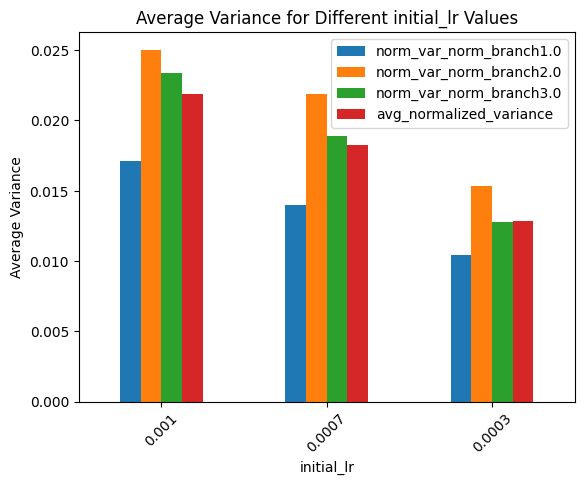

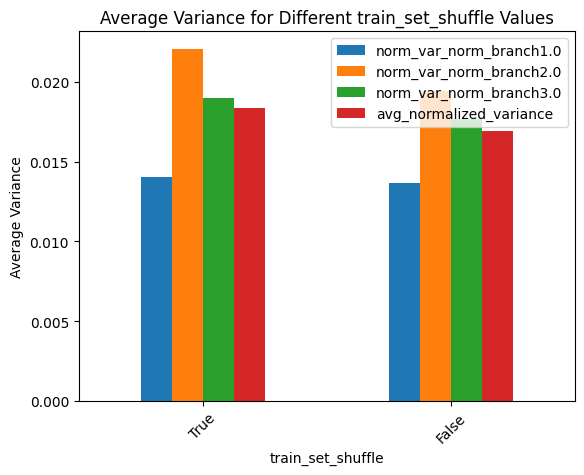

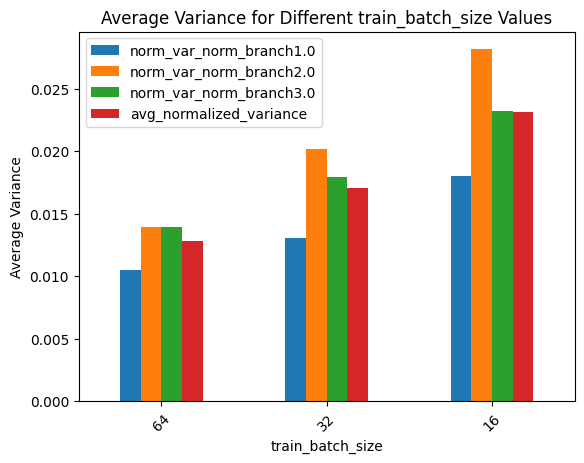

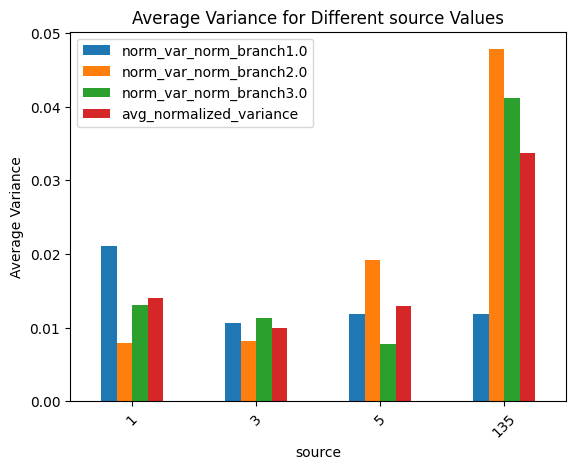

In [8]:
hyperparams_choice_list = {
    'initial_lr': [0.001, 0.0007, 0.0003],
    'train_set_shuffle': [True,False],
    'train_batch_size': [64, 32, 16],
    'source':['1', '3', '5', '135']
}
for hyperparam, variables in hyperparams_choice_list.items():
    plot_variance_for_multiple_hyperparam_values(combined_df, hyperparam, variables)

# T test

In [9]:
def perform_t_test(df, target_column, condition_column, choice1, choice2):
    # Splitting the data into two groups based on the condition
    group1 = df[df[condition_column] == choice1][target_column]
    group2 = df[df[condition_column] == choice2][target_column]

    # Performing the independent t-test
    t_statistic, p_value = ttest_ind(group1, group2)

    return t_statistic, p_value

initial_lr

In [10]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0007)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: 1.003728787450467 P-value: 0.320760300748086


In [11]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0003)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: 2.8072555057837683 P-value: 0.007304917688751415


In [12]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'initial_lr', 0.0007, 0.0003)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: 1.797006596925829 P-value: 0.07890172220158594


train_set_shuffle

In [13]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_set_shuffle', True, False)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: 0.5191259435808778 P-value: 0.605310398892835


train_batch_size

In [14]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_batch_size', 64, 32)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -1.4951210731193472 P-value: 0.1417121355030758


In [15]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_batch_size', 64, 16)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -3.287711028496893 P-value: 0.001940062895154132


In [16]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'train_batch_size', 32, 16)
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: -1.681001480035585 P-value: 0.09954146528140921


dataset

In [17]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'source', 'fashion', 'mnist')
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: nan P-value: nan


In [18]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'source', 'svhn', 'fashion')
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: nan P-value: nan


In [19]:
result = perform_t_test(combined_df, 'avg_normalized_variance', 'source', 'svhn', 'mnist')
print("T-statistic:", result[0], "P-value:", result[1])

T-statistic: nan P-value: nan


# Paired T test

In [20]:
def one_sided_paired_ttest(data_set1, data_set2):
    """
    Perform a one-sided paired t-test to determine if the first data set is statistically larger than the second.

    Parameters:
    data_set1 (array-like): The first set of data.
    data_set2 (array-like): The second set of data.

    Returns:
    tuple: A tuple containing the t-statistic and the one-sided p-value.
    """
    t_statistic, p_value = ttest_rel(data_set1, data_set2)

    # Adjust p-value for one-sided test
    if t_statistic > 0:
        p_value_one_sided = p_value / 2
    else:
        p_value_one_sided = 1 - (p_value / 2)

    return t_statistic, p_value_one_sided

# Example usage:
# t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
# print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)


In [21]:
def find_rows_with_fixed_conditions(df, conditions):
    # Filter the DataFrame based on the conditions
    filtered_df = df
    for column, value in conditions.items():
        filtered_df = filtered_df[filtered_df[column] == value]

    return filtered_df

In [22]:
def generate_hyperparameter_combinations(hyperparams):
    """
    Generate a sequence of hyperparameter combinations.

    :param hyperparams: A dictionary where keys are the names of hyperparameters,
                        and values are lists of possible choices for each hyperparameter.
    :return: A list of dictionaries, each representing a unique combination of hyperparameters.
    """
    # Extract the hyperparameter names and their corresponding choices
    keys, values = zip(*hyperparams.items())

    # Generate all possible combinations of hyperparameter values
    all_combinations = [dict(zip(keys, v)) for v in itertools.product(*values)]

    return all_combinations

In [23]:
def get_all_pairs(df, hyperparams_choice_list, target_column, condition_column, choice1, choice2):
    hyperparams_choice_list_compressed = {key: value for key, value in hyperparams_choice_list.items() if key != condition_column}
    all_combinations = generate_hyperparameter_combinations(hyperparams_choice_list_compressed)
    choice1_target_values=[]
    choice2_target_values=[]
    for conditions in all_combinations:
      x = find_rows_with_fixed_conditions(df, conditions)
      try:
        choice1_value = float(x[x[condition_column] == choice1][target_column])
        choice2_value = float(x[x[condition_column] == choice2][target_column])
        print(choice1_value, choice2_value)
      except:
        continue
      choice1_target_values.append(choice1_value)
      choice2_target_values.append(choice2_value)
    return choice1_target_values, choice2_target_values

initial_lr

In [24]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0007)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0140104053134894 0.0138279737947188
0.0050556862244171 0.003802072180321
0.0126301592256902 0.0105492326735441
0.0292087192475562 0.0265160933065436
0.0136048890086049 0.0140620361460385
0.0126335105590046 0.0084962256164577
0.0162332768326254 0.0135460876325771
0.0422133209187265 0.0384057267721206
0.0165145175103728 0.0152939229513642
0.0318436201927786 0.0200859438532855
0.0294117522423161 0.019118498911245
0.049972873863942 0.0449108088232437
0.0145342902102649 0.0132498911240127
0.0058282931868028 0.0045674598399702
0.0100328073290241 0.0081008007251875
0.0268745372396222 0.0225126572651678
0.0140279245526741 0.0126525478874637
0.0112622377810907 0.0073130165535939
0.0124913479344595 0.0110752957692386
0.0399161808054389 0.0364324219955661
0.0161340603508624 0.0150791218269088
0.0255132593479673 0.01731114488299
0.0253526556953441 0.0159634126026888
0.0489411192924455 0.0448352982419005
T-statistic: 5.439124805346478 One-sided P-value: 7.899797985035064e-06


In [25]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'initial_lr', 0.0007, 0.0003)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0138279737947188 0.0130978906381888
0.003802072180321 0.0040985515809937
0.0105492326735441 0.0056816838190857
0.0265160933065436 0.0197791698339821
0.0140620361460385 0.0133893394520301
0.0084962256164577 0.0037293125421709
0.0135460876325771 0.007985049889513
0.0384057267721206 0.0282647586861679
0.0152939229513642 0.0137943382891393
0.0200859438532855 0.0050668602689939
0.019118498911245 0.0115742578463746
0.0449108088232437 0.0328480447910859
0.0132498911240127 0.0128781033047768
0.0045674598399702 0.0048672445401533
0.0081008007251875 0.0053517526670361
0.0225126572651678 0.0195794868148592
0.0126525478874637 0.0134298631956643
0.0073130165535939 0.0038595661134233
0.0110752957692386 0.0070137439032743
0.0364324219955661 0.0270694975850889
0.0150791218269088 0.013474331808252
0.01731114488299 0.0042822756495193
0.0159634126026888 0.0100954183752305
0.0448352982419005 0.0271763848120582
T-statistic: 5.118514417861124 One-sided P-value: 1.7391412843631927e-05


In [26]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'initial_lr', 0.001, 0.0003)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0140104053134894 0.0130978906381888
0.0050556862244171 0.0040985515809937
0.0126301592256902 0.0056816838190857
0.0292087192475562 0.0197791698339821
0.0136048890086049 0.0133893394520301
0.0126335105590046 0.0037293125421709
0.0162332768326254 0.007985049889513
0.0422133209187265 0.0282647586861679
0.0165145175103728 0.0137943382891393
0.0318436201927786 0.0050668602689939
0.0294117522423161 0.0115742578463746
0.049972873863942 0.0328480447910859
0.0145342902102649 0.0128781033047768
0.0058282931868028 0.0048672445401533
0.0100328073290241 0.0053517526670361
0.0268745372396222 0.0195794868148592
0.0140279245526741 0.0134298631956643
0.0112622377810907 0.0038595661134233
0.0124913479344595 0.0070137439032743
0.0399161808054389 0.0270694975850889
0.0161340603508624 0.013474331808252
0.0255132593479673 0.0042822756495193
0.0253526556953441 0.0100954183752305
0.0489411192924455 0.0271763848120582
T-statistic: 5.711840035585732 One-sided P-value: 4.06350181199879e-06


train_set_shuffle

In [27]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_set_shuffle', True, False)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0140104053134894 0.0145342902102649
0.0050556862244171 0.0058282931868028
0.0126301592256902 0.0100328073290241
0.0292087192475562 0.0268745372396222
0.0136048890086049 0.0140279245526741
0.0126335105590046 0.0112622377810907
0.0162332768326254 0.0124913479344595
0.0422133209187265 0.0399161808054389
0.0165145175103728 0.0161340603508624
0.0318436201927786 0.0255132593479673
0.0294117522423161 0.0253526556953441
0.049972873863942 0.0489411192924455
0.0138279737947188 0.0132498911240127
0.003802072180321 0.0045674598399702
0.0105492326735441 0.0081008007251875
0.0265160933065436 0.0225126572651678
0.0140620361460385 0.0126525478874637
0.0084962256164577 0.0073130165535939
0.0135460876325771 0.0110752957692386
0.0384057267721206 0.0364324219955661
0.0152939229513642 0.0150791218269088
0.0200859438532855 0.01731114488299
0.019118498911245 0.0159634126026888
0.0449108088232437 0.0448352982419005
0.0130978906381888 0.0128781033047768
0.0040985515809937 0.0048672445401533
0.005681683819085

train_batch_size

In [28]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_batch_size', 32, 64)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0136048890086049 0.0140104053134894
0.0126335105590046 0.0050556862244171
0.0162332768326254 0.0126301592256902
0.0422133209187265 0.0292087192475562
0.0140279245526741 0.0145342902102649
0.0112622377810907 0.0058282931868028
0.0124913479344595 0.0100328073290241
0.0399161808054389 0.0268745372396222
0.0140620361460385 0.0138279737947188
0.0084962256164577 0.003802072180321
0.0135460876325771 0.0105492326735441
0.0384057267721206 0.0265160933065436
0.0126525478874637 0.0132498911240127
0.0073130165535939 0.0045674598399702
0.0110752957692386 0.0081008007251875
0.0364324219955661 0.0225126572651678
0.0133893394520301 0.0130978906381888
0.0037293125421709 0.0040985515809937
0.007985049889513 0.0056816838190857
0.0282647586861679 0.0197791698339821
0.0134298631956643 0.0128781033047768
0.0038595661134233 0.0048672445401533
0.0070137439032743 0.0053517526670361
0.0270694975850889 0.0195794868148592
T-statistic: 4.3626165544101925 One-sided P-value: 0.00011401698297361929


In [29]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_batch_size', 16, 32)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0165145175103728 0.0136048890086049
0.0318436201927786 0.0126335105590046
0.0294117522423161 0.0162332768326254
0.049972873863942 0.0422133209187265
0.0161340603508624 0.0140279245526741
0.0255132593479673 0.0112622377810907
0.0253526556953441 0.0124913479344595
0.0489411192924455 0.0399161808054389
0.0152939229513642 0.0140620361460385
0.0200859438532855 0.0084962256164577
0.019118498911245 0.0135460876325771
0.0449108088232437 0.0384057267721206
0.0150791218269088 0.0126525478874637
0.01731114488299 0.0073130165535939
0.0159634126026888 0.0110752957692386
0.0448352982419005 0.0364324219955661
0.0137943382891393 0.0133893394520301
0.0050668602689939 0.0037293125421709
0.0115742578463746 0.007985049889513
0.0328480447910859 0.0282647586861679
0.013474331808252 0.0134298631956643
0.0042822756495193 0.0038595661134233
0.0100954183752305 0.0070137439032743
0.0271763848120582 0.0270694975850889
T-statistic: 5.634518686225612 One-sided P-value: 4.9030419364808115e-06


In [30]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'train_batch_size', 16, 64)
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0165145175103728 0.0140104053134894
0.0318436201927786 0.0050556862244171
0.0294117522423161 0.0126301592256902
0.049972873863942 0.0292087192475562
0.0161340603508624 0.0145342902102649
0.0255132593479673 0.0058282931868028
0.0253526556953441 0.0100328073290241
0.0489411192924455 0.0268745372396222
0.0152939229513642 0.0138279737947188
0.0200859438532855 0.003802072180321
0.019118498911245 0.0105492326735441
0.0449108088232437 0.0265160933065436
0.0150791218269088 0.0132498911240127
0.01731114488299 0.0045674598399702
0.0159634126026888 0.0081008007251875
0.0448352982419005 0.0225126572651678
0.0137943382891393 0.0130978906381888
0.0050668602689939 0.0040985515809937
0.0115742578463746 0.0056816838190857
0.0328480447910859 0.0197791698339821
0.013474331808252 0.0128781033047768
0.0042822756495193 0.0048672445401533
0.0100954183752305 0.0053517526670361
0.0271763848120582 0.0195794868148592
T-statistic: 5.923369443969637 One-sided P-value: 2.4380598283389707e-06


Baseline comparison

In [31]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  '1','3')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0140104053134894 0.0050556862244171
0.0136048890086049 0.0126335105590046
0.0165145175103728 0.0318436201927786
0.0145342902102649 0.0058282931868028
0.0140279245526741 0.0112622377810907
0.0161340603508624 0.0255132593479673
0.0138279737947188 0.003802072180321
0.0140620361460385 0.0084962256164577
0.0152939229513642 0.0200859438532855
0.0132498911240127 0.0045674598399702
0.0126525478874637 0.0073130165535939
0.0150791218269088 0.01731114488299
0.0130978906381888 0.0040985515809937
0.0133893394520301 0.0037293125421709
0.0137943382891393 0.0050668602689939
0.0128781033047768 0.0048672445401533
0.0134298631956643 0.0038595661134233
0.013474331808252 0.0042822756495193
T-statistic: 2.3254043913343456 One-sided P-value: 0.01634186823620501


In [32]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source', '1', '5')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0140104053134894 0.0126301592256902
0.0136048890086049 0.0162332768326254
0.0165145175103728 0.0294117522423161
0.0145342902102649 0.0100328073290241
0.0140279245526741 0.0124913479344595
0.0161340603508624 0.0253526556953441
0.0138279737947188 0.0105492326735441
0.0140620361460385 0.0135460876325771
0.0152939229513642 0.019118498911245
0.0132498911240127 0.0081008007251875
0.0126525478874637 0.0110752957692386
0.0150791218269088 0.0159634126026888
0.0130978906381888 0.0056816838190857
0.0133893394520301 0.007985049889513
0.0137943382891393 0.0115742578463746
0.0128781033047768 0.0053517526670361
0.0134298631956643 0.0070137439032743
0.013474331808252 0.0100954183752305
T-statistic: 0.8950577771298267 One-sided P-value: 0.19162723220362626


In [33]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  '5', '3')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0126301592256902 0.0050556862244171
0.0162332768326254 0.0126335105590046
0.0294117522423161 0.0318436201927786
0.0100328073290241 0.0058282931868028
0.0124913479344595 0.0112622377810907
0.0253526556953441 0.0255132593479673
0.0105492326735441 0.003802072180321
0.0135460876325771 0.0084962256164577
0.019118498911245 0.0200859438532855
0.0081008007251875 0.0045674598399702
0.0110752957692386 0.0073130165535939
0.0159634126026888 0.01731114488299
0.0056816838190857 0.0040985515809937
0.007985049889513 0.0037293125421709
0.0115742578463746 0.0050668602689939
0.0053517526670361 0.0048672445401533
0.0070137439032743 0.0038595661134233
0.0100954183752305 0.0042822756495193
T-statistic: 4.184780424183509 One-sided P-value: 0.0003108578020728897


In [34]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  '135', '1')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0292087192475562 0.0140104053134894
0.0422133209187265 0.0136048890086049
0.049972873863942 0.0165145175103728
0.0268745372396222 0.0145342902102649
0.0399161808054389 0.0140279245526741
0.0489411192924455 0.0161340603508624
0.0265160933065436 0.0138279737947188
0.0384057267721206 0.0140620361460385
0.0449108088232437 0.0152939229513642
0.0225126572651678 0.0132498911240127
0.0364324219955661 0.0126525478874637
0.0448352982419005 0.0150791218269088
0.0197791698339821 0.0130978906381888
0.0282647586861679 0.0133893394520301
0.0328480447910859 0.0137943382891393
0.0195794868148592 0.0128781033047768
0.0270694975850889 0.0134298631956643
0.0271763848120582 0.013474331808252
T-statistic: 9.207269542220246 One-sided P-value: 2.561051736837899e-08


In [35]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  '135', '3')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0292087192475562 0.0050556862244171
0.0422133209187265 0.0126335105590046
0.049972873863942 0.0318436201927786
0.0268745372396222 0.0058282931868028
0.0399161808054389 0.0112622377810907
0.0489411192924455 0.0255132593479673
0.0265160933065436 0.003802072180321
0.0384057267721206 0.0084962256164577
0.0449108088232437 0.0200859438532855
0.0225126572651678 0.0045674598399702
0.0364324219955661 0.0073130165535939
0.0448352982419005 0.01731114488299
0.0197791698339821 0.0040985515809937
0.0282647586861679 0.0037293125421709
0.0328480447910859 0.0050668602689939
0.0195794868148592 0.0048672445401533
0.0270694975850889 0.0038595661134233
0.0271763848120582 0.0042822756495193
T-statistic: 21.266722707270006 One-sided P-value: 5.472102404361033e-14


In [36]:
data_pairs=get_all_pairs(combined_df, hyperparams_choice_list, 'avg_normalized_variance', 'source',  '135', '5')
t_statistic, p_value_one_sided = one_sided_paired_ttest(data_pairs[0], data_pairs[1])
print("T-statistic:", t_statistic, "One-sided P-value:", p_value_one_sided)

0.0292087192475562 0.0126301592256902
0.0422133209187265 0.0162332768326254
0.049972873863942 0.0294117522423161
0.0268745372396222 0.0100328073290241
0.0399161808054389 0.0124913479344595
0.0489411192924455 0.0253526556953441
0.0265160933065436 0.0105492326735441
0.0384057267721206 0.0135460876325771
0.0449108088232437 0.019118498911245
0.0225126572651678 0.0081008007251875
0.0364324219955661 0.0110752957692386
0.0448352982419005 0.0159634126026888
0.0197791698339821 0.0056816838190857
0.0282647586861679 0.007985049889513
0.0328480447910859 0.0115742578463746
0.0195794868148592 0.0053517526670361
0.0270694975850889 0.0070137439032743
0.0271763848120582 0.0100954183752305
T-statistic: 17.99194318819149 One-sided P-value: 8.370819538811177e-13
